In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

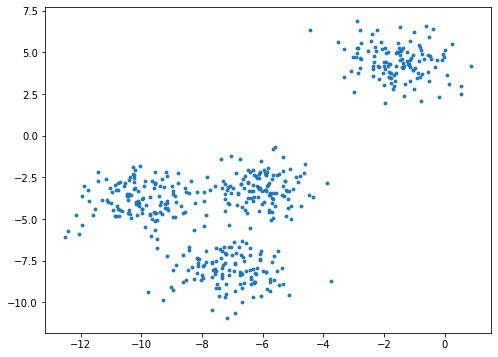

In [2]:
x, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

# 绘图，查看数据样本的分布
fig, ax = plt.subplots(1)
fig.set_size_inches(8,6)
ax.scatter(x[:, 0], x[:, 1], marker='o', s=8)
plt.show()

上图可以分成几类呢？有人说 2 类，有人说 4 类
这时就需要通过轮廓系数来帮我们确定

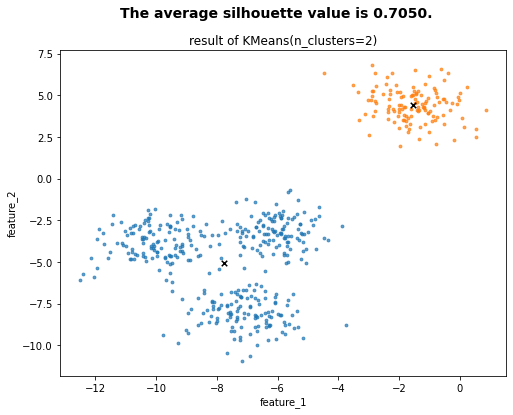

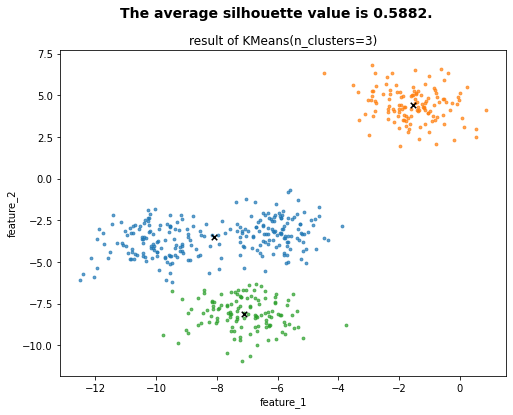

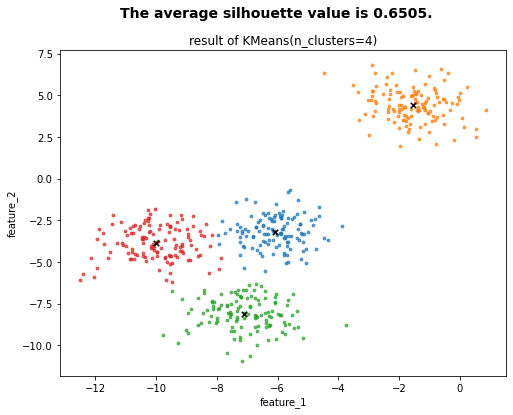

In [3]:
# 给定K值（n_clusters）的范围
n_clusters = range(2, 5)

# 循环绘图
for n in n_clusters:
    # 创建绘图区域
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8, 6)

    # 实例化
    cluster = KMeans(n_clusters=n,random_state=10).fit(x)
    # 访问 labels_ 属性，获得聚类结果
    y_pred = cluster.labels_
    # 访问 cluster_centers_ 属性，获得质心坐标
    centroid = cluster.cluster_centers_
    # 计算平均轮廓系数
    silhouette_avg = silhouette_score(x, y_pred)

    # 绘制聚类结果
    # y_pred==i 会返回布尔数组，从而获得那些被分为同一类的点
    for i in range(n):
        ax.scatter(x[y_pred==i, 0],x[y_pred==i, 1],marker='o',s=8,alpha=0.7)
    # 绘制质心
    ax.scatter(centroid[:, 0],centroid[:, 1],marker='x',s=30,c='k')
    # 设置图表标题
    ax.set_title('result of KMeans(n_clusters={})'.format(n))
    # 设置x轴标题
    ax.set_xlabel('feature_1')
    # 设置y轴标题
    ax.set_ylabel('feature_2')
    # 设置总标题，用来描述轮廓系数的值
    plt.suptitle('The average silhouette value is {:.4f}.'.format(silhouette_avg),
                 fontsize=14, fontweight='bold')
    plt.show()

K=2，S=0.7050
K=3，S=0.5882
K=4，S=0.6505

然而当 K=2 时，得分竟然是最高的，这与我们最初创建数据集时给的真实分类 centers=4 是不一致的！

1. 轮廓系数确实能帮助我们确定 K 的取值，并且分数越接近 1，越能代表更好的聚类效果
2. 分数最高的 K 值，并不一定是正确的聚类结果（虽然我们可能并不知道真实的分类）
3. 实际应用中，需要紧密结合轮廓系数与业务需求，才能得到恰当的结果